In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df =pd.read_csv('churn_prediction.csv')
df.head()

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,101348.88,1
1,1,-0.440036,0,0,0.198164,1,0.117350,1,0,1,112542.58,0
2,2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,113931.57,1
3,3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,93826.63,0
4,4,2.063884,0,0,0.388871,2,0.785728,1,1,1,79084.10,0


In [54]:
del  df['Unnamed: 0']
del df['Geography']
del df['CreditScore']
# del df['Gender']

In [55]:
df.head()

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0.293517,2,-1.225848,1,1,1,101348.88,1
1,0,0.198164,1,0.117350,1,0,1,112542.58,0
2,0,0.293517,8,1.333053,3,1,0,113931.57,1
3,0,0.007457,1,-1.225848,2,0,0,93826.63,0
4,0,0.388871,2,0.785728,1,1,1,79084.10,0


## Splitting the data

In [56]:
x = df.iloc[:,0:7] # input data
y = df.iloc[:,-1]  # output data

In [57]:
x

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,0,0.293517,2,-1.225848,1,1,1
1,0,0.198164,1,0.117350,1,0,1
2,0,0.293517,8,1.333053,3,1,0
3,0,0.007457,1,-1.225848,2,0,0
4,0,0.388871,2,0.785728,1,1,1
...,...,...,...,...,...,...,...
9995,1,0.007457,5,-1.225848,2,1,0
9996,1,-0.373958,10,-0.306379,1,1,1
9997,0,-0.278604,7,-1.225848,1,0,1
9998,1,0.293517,3,-0.022608,2,1,0


In [58]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.4)

## Scaling the data

In [59]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [60]:
scaled_x_train = scalar.fit_transform(x_train)
scaled_x_test = scalar.transform(x_test)

## Support vector Regression Model

In [61]:
from sklearn.svm import SVR
regressor  = SVR()        # you can select the kernel ---> svr(kernel = '')
regressor.fit(scaled_x_train,y_train)

SVR()

In [62]:
prediction = regressor.predict(scaled_x_test)

In [63]:
prediction[:10]

array([0.08283277, 0.08547678, 0.02799386, 0.02922095, 0.22905009,
       0.23060148, 0.0909972 , 0.03351391, 1.06990823, 0.05024495])

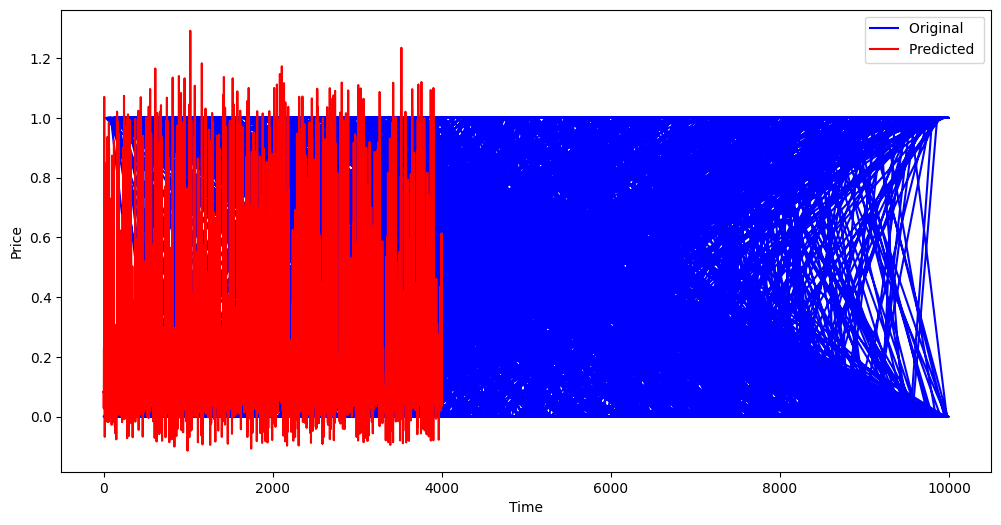

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label = "Original ")
plt.plot(prediction , 'r' , label = "Predicted ")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test , prediction)

0.11843319830090339